# Spectral Clustering

In [1]:
# import libraries
import pandas as pd
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

# set options for rendering plots
%matplotlib inline

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

Given an image, let graph G = (V, E) with nodes V = {pixels} and edges E = similarity between pixels <br>
<br>
Define a similarity matrix using Gaussian Kernel K or adjacency matrix <br>
<br>
The segmentation is then just a partition (cut) of the graph <br>
<br>
K-means is better for compact clusters, spectral clustering is better for connected clusters

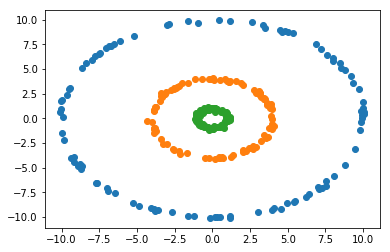

In [46]:
# make three circles
import math
points = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points[i] = [10*math.cos(theta) + 0.1*np.random.randn(1), 10*math.sin(theta) + 0.1*np.random.randn(1)]
    
points1 = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points1[i] = [4*math.cos(theta) + 0.1*np.random.randn(1), 4*math.sin(theta) + 0.1*np.random.randn(1)]
    
points2 = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points2[i] = [math.cos(theta) + 0.1*np.random.randn(1), math.sin(theta) + 0.1*np.random.randn(1)]

X = np.vstack((points, points1, points2))
y = np.repeat([0, 1, 2], 100)
    
plt.scatter(points[:,0], points[:,1])
plt.scatter(points1[:,0], points1[:,1])
plt.scatter(points2[:,0], points2[:,1])

plt.show();

Defining adjacency matrix A: <br>
<br>
If distance(xi, xj) > $\delta$,  let $A_{i,j}$ = 1, else 0

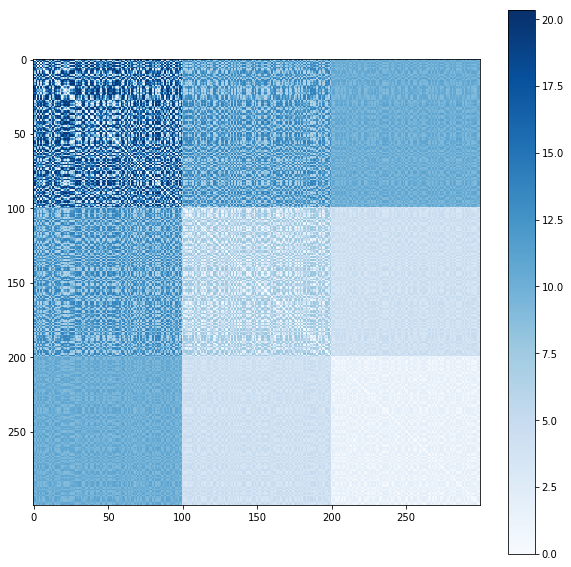

In [47]:
from sklearn.metrics import pairwise_distances
A = pairwise_distances(X)
plt.figure(figsize=(10,10))
plt.imshow(A, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

Define a similarity matrix using the Gaussian kernel

The Gaussian kernel, is given by: <br>
$$K(x, x') = exp^{-\gamma || x - x' || ^2}$$
<br>
where $\gamma$ is a constant parameter, **x, x'** are vectors (or pixels in image segmentation)

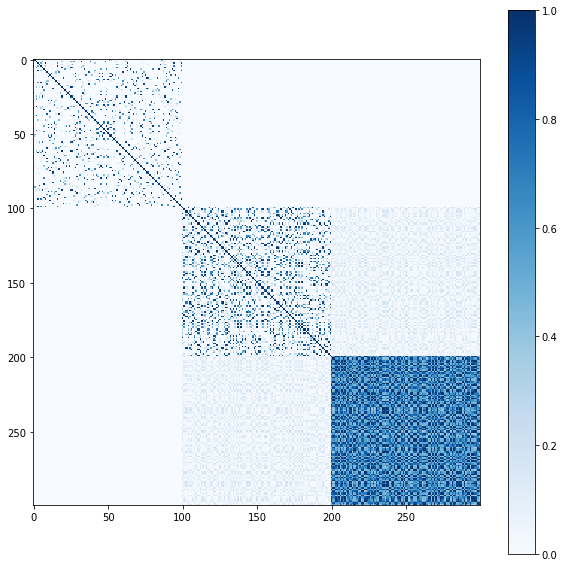

In [48]:
def gauss_ker(gamma, x, y):
    return np.exp(-gamma*(np.linalg.norm(x - y)**2))

kernel_matrix = np.zeros((300, 300))
for i in range(300):
    for j in range(300):
        kernel_matrix[i,j] = gauss_ker(0.2, X[i], X[j])
        
kernel_matrix
plt.figure(figsize=(10,10))
plt.imshow(kernel_matrix, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

Close data points are in the same cluster.   Data points in different clusters are far away.  But data points in the same cluster may also be far away–even farther away than points in different clusters.  Our goal then is to transform the space so that when 2 points $x_{i}$, $x_{j}$ are close, they are  always in  same cluster, and when they are far apart, they are in different clusters.

Laplacian matrix: L = D - W <br>
<br>
Where D is the degree matrix, a diagonal matrix that measures the degree at each node (sum of similarity weights for all edges of that node) <br> <br>
W is the weight matrix assigned to graph edges (if using adjacency matrix, weights = 1) <br>
<br>
In the ideal case where there's good clusters, L is approximately block diagonal where the blocks represent clusters

With good clusters, the similarity matrix will also look approximately block diagonal

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://charlesmartin14.files.wordpress.com/2012/10/l1.png", 
      width = 700, height = 700)

The 3 lowest eigenvalue, eigenvector pairs each correspond to a different cluster <br>
<br>
This restricts the eigenvalue spectrum of L, and to identify k clusters the eigenvalue spectrum of L must have a gap

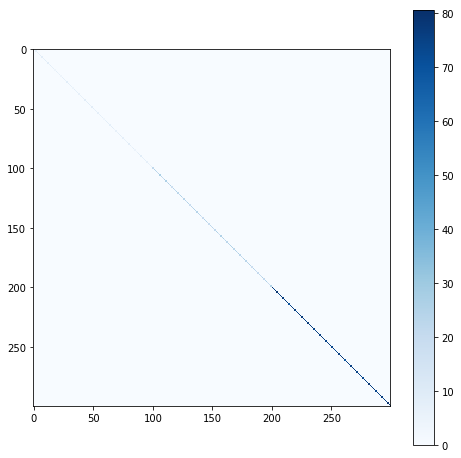

In [49]:
# compute degree matrix D for our example data
D = np.zeros((300, 300))
for i in range(300):
    for j in range(300):
        D[i][i] = D[i][i] + kernel_matrix[i][j] 

plt.figure(figsize=(8,8))
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();        

(300,)

(300, 300)

array([4.23959332e-14, 1.16215686e-02, 4.62210687e-02])

array([[ 8.11567522e-08,  8.39160449e-07,  5.77350269e-02, ...,
        -1.61394394e-08,  3.23156956e-07, -5.31413565e-10],
       [ 1.09363095e-06, -1.39139550e-07,  5.77350269e-02, ...,
        -1.31447631e-07, -1.55042900e-06, -4.23339964e-06],
       [-4.83027229e-07, -4.59084114e-07,  5.77350269e-02, ...,
         1.98784235e-01, -1.40506673e-04,  1.31072893e-04],
       ...,
       [-6.67712827e-02,  5.72199751e-02,  5.77350269e-02, ...,
         6.09381915e-06,  5.36190816e-06,  2.83099885e-06],
       [ 1.04757580e-01, -5.36187915e-02,  5.77350269e-02, ...,
         3.07841138e-06,  1.38904931e-06,  2.22117922e-06],
       [ 1.86419051e-01,  6.73083010e-02,  5.77350269e-02, ...,
        -1.30562798e-06,  8.70146106e-08, -1.57132990e-06]])

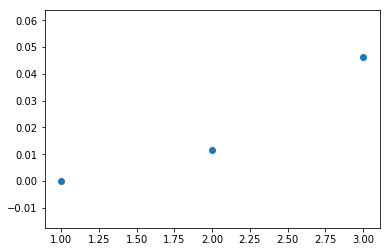

In [66]:
# Laplacian Matrix
W = kernel_matrix
L = D - W
eig_vals, eig_vecs = np.linalg.eig(L)
eig_vals.shape
eig_vecs.shape
np.sort(eig_vals)[:3]
eig_vecs
plt.scatter([1, 2, 3], np.sort(eig_vals)[:3])

C:\Users\1394852\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


array([4.23959332e-14, 1.16215686e-02, 4.62210687e-02])

<Figure size 576x576 with 0 Axes>

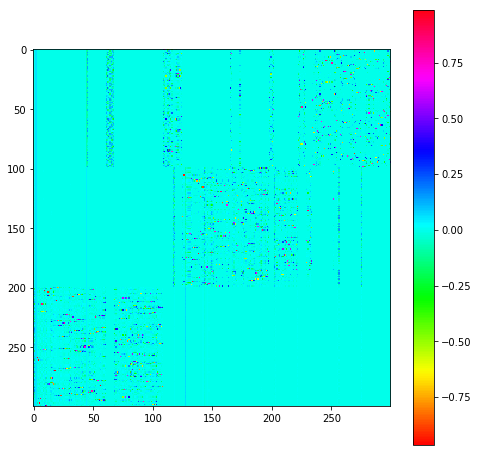

In [57]:
L_normalized = (D**-0.5) * L * (D**-0.5)
eig_vals, eig_vecs = np.linalg.eig(L)
np.sort(eig_vals)[:3]

plt.figure(figsize=(8,8))
plt.imshow(eig_vecs, zorder=2, cmap='hsv', interpolation='nearest')
plt.colorbar()    

In [72]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
labels = spectral_clustering(W, n_clusters=3, eigen_solver='arpack')
labels

array([0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Applying to real image

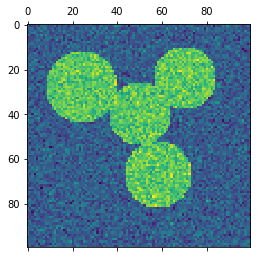

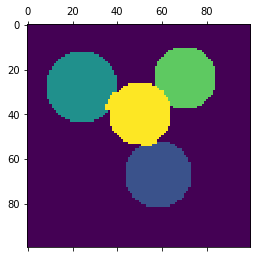

In [10]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im);

In [13]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

(280, 300)

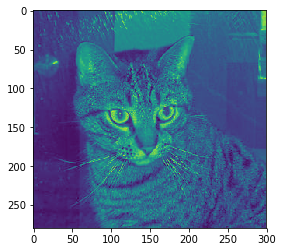

In [15]:
import matplotlib.image
cat = matplotlib.image.imread("C:/Users/1394852/Desktop/ml_project/dogs_cats/cat.1.jpg")
cat = rgb2gray(cat)
plt.imshow(cat)

# pixel height, width
cat.shape

(84000,)

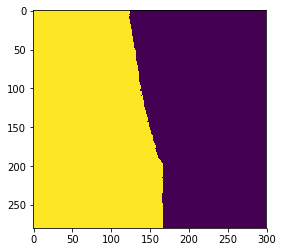

In [27]:
labels.shape
plt.imshow(labels.reshape((280, 300)))

In [ ]:
# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(cat)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im);